# Online Business Sales 2017-2019 - Paphawit

>**"Prediction is very difficult, especially if it's about the future."** — Niels Bohr

Every company has their own record. The record will help them to explain how well their understand thier past performance or how their should be in the future. The good sales forecast can help company decrease loss in miscalculating demand of customer. The company should invest in sales analysis to make higher profit.

For this notebook, the dataset is consist of historical sales data of each category over time. There are two tables in this dataset. The first one is the detail of product sold. The second is the time series record.

The Final step of this notebook will use the dataset to predict the future by regression.

***

# Table of Contents

- [Importing Data](#importing)
- [Exploring Data](#exploring)
- [Plotting Figures](#plotting)
- [Time Series Analysis](#time-series)
- [Sales Perdiction](#sales-prediction)
- [Recommendation](#recommendation)

***

# Importing Data <a class="anchor" id="importing"></a>

To start the notebook, read data from two csv files:
1. **business.retailsales.csv:** sales of each category record
2. **business.retailsales2.csv:** sales record by month

In [1]:
# Import related library
import numpy as np
import pandas as pd

df_read_1 = pd.read_csv('business.retailsales.csv')
df_read_2 = pd.read_csv('business.retailsales2.csv')

***

# Exploring Data <a class="anchor" id="exploring"></a>

The first step of exploring data is to open the csv file to see what is inside.

In [2]:
# Copy datafram from original dataframe
df = df_read_1.copy()

# Use head() to see the quick view of dataframe
df.head()

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Art & Sculpture,34,14935.0,-594.00,-1609.0,12732.00
1,Basket,13,3744.0,-316.80,0.0,3427.20
2,Basket,12,3825.0,-201.60,-288.0,3335.40
3,Basket,17,3035.0,-63.25,0.0,2971.75
4,Art & Sculpture,47,2696.8,-44.16,0.0,2652.64


In [3]:
# Use info() function to see type of data and missing value 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product Type     1767 non-null   object 
 1   Net Quantity     1775 non-null   int64  
 2   Gross Sales      1775 non-null   float64
 3   Discounts        1775 non-null   float64
 4   Returns          1775 non-null   float64
 5   Total Net Sales  1775 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 83.3+ KB


There are missing values in Product Type. Let's see what it looks like.

In [4]:
# See the missing value of product type
df[df['Product Type'].isna()]

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
550,NaN,1,158.0,0.0,0.0,158.0
703,NaN,1,128.0,0.0,0.0,128.0
1028,NaN,1,75.0,0.0,0.0,75.0
1030,NaN,1,75.0,0.0,0.0,75.0
1287,NaN,1,48.0,0.0,0.0,48.0
1370,NaN,1,42.0,0.0,0.0,42.0
1618,NaN,1,24.0,0.0,0.0,24.0
1761,NaN,1,10.5,0.0,0.0,10.5


The NaN product type is hard to define, In summary, the NaN rows need to be dropped. The dataframe has no value to count the number of order. For that reason, the dataframe will be inserted the constant value of "1".

In [5]:
# Drop the NA of Product Type column
df = df.dropna(subset=['Product Type'])

# Insert constant value to count the number of order
df.insert(1,'Count Order',1)

There are very repetitive value in "Product Type". The pivot table will let the dataframe to be intrepreted easier.

In [6]:
# Pivot table by Product Type
df_group = df.groupby('Product Type').sum()
df_group['Average Quantity Per Order'] =  round(df_group['Net Quantity'] / df_group['Count Order'], 2)
df_group['Average Sales Per Unit'] = round(df_group['Gross Sales'] / df_group['Net Quantity'], 2)
df_group

,Count Order,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales,Average Quantity Per Order,Average Sales Per Unit
Product Type,,,,,,,,
Accessories,39,84,3892.40,-107.02,0.00,3785.38,2.15,46.34
Art & Sculpture,337,1427,90316.60,-2955.82,-2879.93,84480.85,4.23,63.29
Basket,551,1461,143815.50,-4584.42,-4439.69,134791.39,2.65,98.44
Christmas,73,575,15476.00,-345.19,-670.00,14460.81,7.88,26.91
Easter,1,1,38.00,-3.80,0.00,34.20,1.00,38.00
Fair Trade Gifts,28,110,2258.00,-53.33,0.00,2204.67,3.93,20.53
Furniture,16,27,2034.00,-169.04,0.00,1864.96,1.69,75.33
Gift Baskets,1,1,19.50,0.00,0.00,19.50,1.00,19.50
Home Decor,131,404,27114.55,-991.21,-423.35,25699.99,3.08,67.12


***

# Plotting Figures <a class="anchor" id="plotting"></a>

To see the details of data for each columns, plot the figures to see distribution.

In [7]:
# Import visualize library
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration plotting
def plot_config(figsize, xticks_rotation, title, ylim):
    plt.figure(figsize=figsize)
    plt.xticks(rotation=xticks_rotation)
    plt.title(title)
    plt.ylim(ylim)

# Create number label in histogram    
def histogram_label(histogram, space):
    for p in histogram.patches:
        height = p.get_height()
        histogram.text(x=p.get_x()+(p.get_width()/2),
        y = height+space,
        s = '{:.0f}'.format(height),
        ha = 'center')
        
# Create number label in countplot        
def plot_label(label_value, space, rotation):
    for index,data in enumerate(label_value):
        plt.text(x=index, y=data+space, s='{:,}'.format(data), horizontalalignment='center', rotation=rotation)

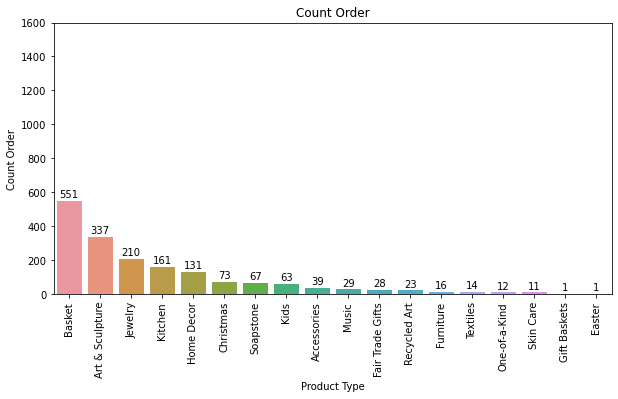

In [8]:
# Create barplot of Count Order
column_name = 'Count Order'
plot_config(figsize=(10,5), xticks_rotation=90, title=column_name, ylim=(0,1600))
countorder_barplot = sns.barplot(x=df_group.sort_values(by=column_name,ascending=False).index,y=column_name,data=df_group.sort_values(by=column_name,ascending=False))
plot_label(df_group[column_name].sort_values(ascending=False),space=20,rotation=0)

The most frequency of order in the company is **Basket** following by **Art & Sculture** and **Jewelry** respectively.

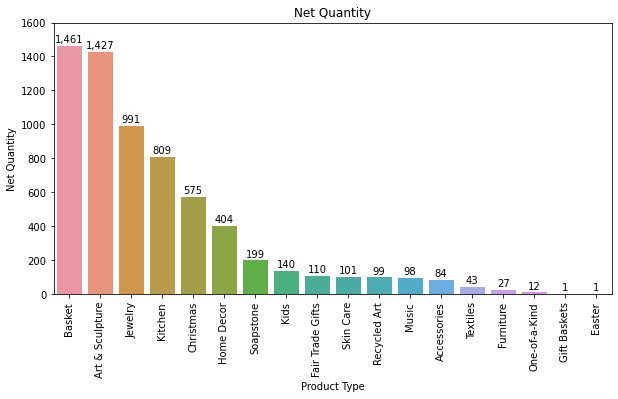

In [10]:
# Create barplot of Net Quantity
column_name = 'Net Quantity'
plot_config(figsize=(10,5), xticks_rotation=90, title=column_name, ylim=(0,1600))
netquantiy_barplot = sns.barplot(x=df_group.sort_values(by=column_name,ascending=False).index,y=column_name,data=df_group.sort_values(by=column_name,ascending=False))
plot_label(df_group[column_name].sort_values(ascending=False),space=20,rotation=0)

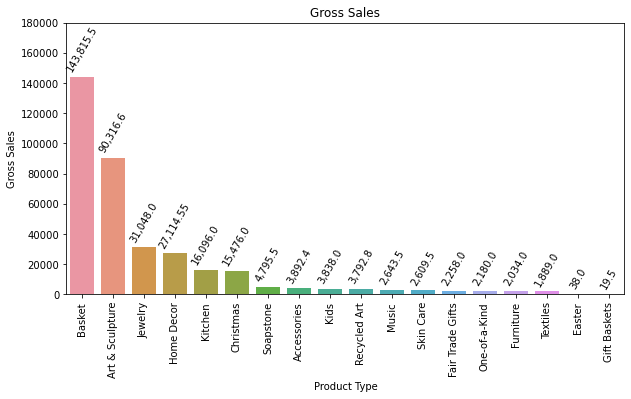

In [11]:
# Create barplot of Gross Sales
column_name = 'Gross Sales'
plot_config(figsize=(10,5), xticks_rotation=90, title=column_name, ylim=(0,180000))
gross_barplot = sns.barplot(x=df_group.sort_values(by=column_name,ascending=False).index,y=column_name,data=df_group.sort_values(by=column_name,ascending=False))
plot_label(df_group[column_name].sort_values(ascending=False),space=4000,rotation=60)

The highest net quantity and gross sales products in the company is also **Basket** following by **Art & Sculture** and **Jewelry**.

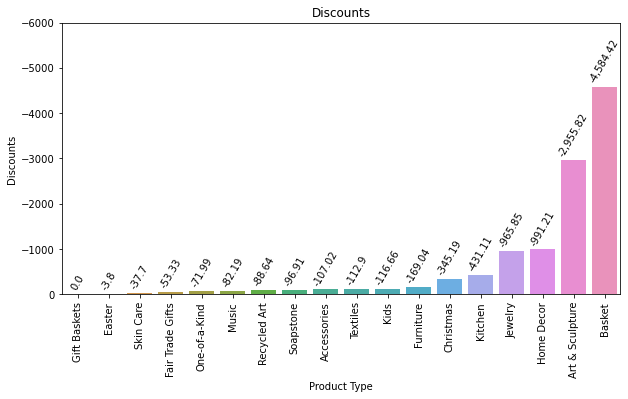

In [13]:
# Create barplot of Discounts
column_name = 'Discounts'
plot_config(figsize=(10,5), xticks_rotation=90, title=column_name, ylim=(0,-6000))
discounts_barplot = sns.barplot(x=df_group.sort_values(by=column_name,ascending=False).index,y=column_name,data=df_group.sort_values(by=column_name,ascending=False))
plot_label(df_group[column_name].sort_values(ascending=False),space=-100,rotation=60)

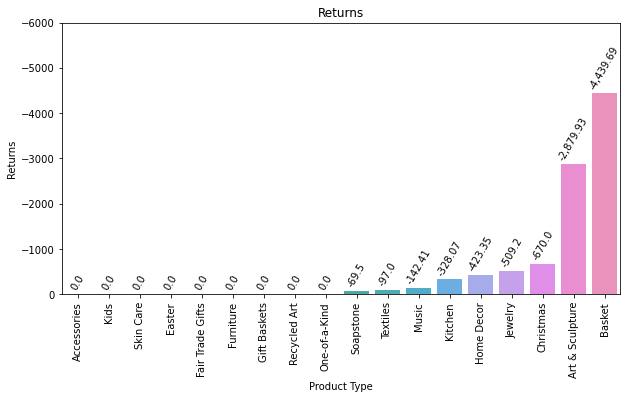

In [14]:
# Create barplot of Returns
column_name = 'Returns'
plot_config(figsize=(10,5), xticks_rotation=90, title=column_name, ylim=(0,-6000))
returns_barplot = sns.barplot(x=df_group.sort_values(by=column_name,ascending=False).index,y=column_name,data=df_group.sort_values(by=column_name,ascending=False))
plot_label(df_group[column_name].sort_values(ascending=False),space=-100,rotation=60)

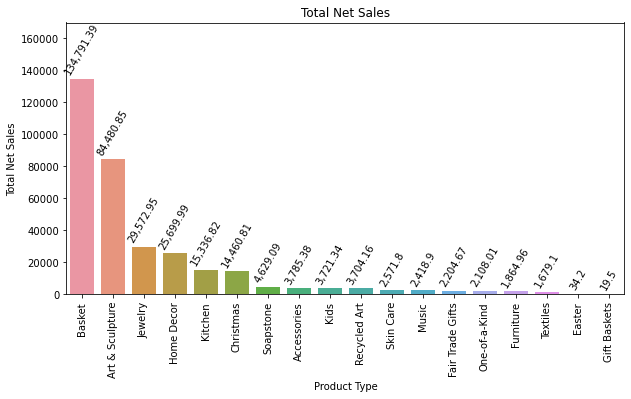

In [15]:
# Create barplot of Total Net Sales
column_name = 'Total Net Sales'
plot_config(figsize=(10,5), xticks_rotation=90, title=column_name, ylim=(0,170000))
totalnet_barplot = sns.barplot(x=df_group.sort_values(by=column_name,ascending=False).index,y=column_name,data=df_group.sort_values(by=column_name,ascending=False))
plot_label(df_group[column_name].sort_values(ascending=False),space=3000,rotation=60)

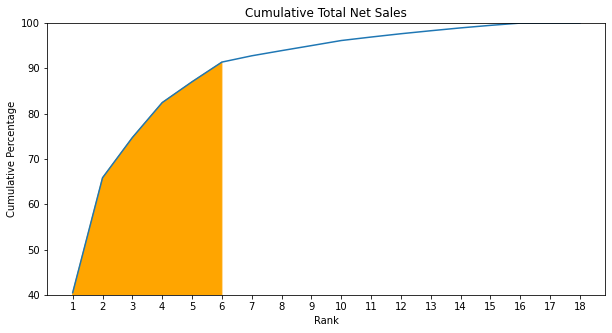

In [16]:
# Plot the cumulative Total Net Sales
df_cumsum = pd.DataFrame(df_group['Total Net Sales'].sort_values(ascending=False).cumsum())
df_cumsum = df_cumsum.rename(columns={'Total Net Sales': 'Cumulative Total Net Sales'})
df_cumsum['Cumulative Percentage'] = round(df_cumsum['Cumulative Total Net Sales'] / df_group['Total Net Sales'].sum(),4) * 100
df_cumsum['Rank'] = np.arange(1,len(df_cumsum)+1,1)
plot_config(figsize=(10,5), xticks_rotation=0, title='Cumulative Total Net Sales', ylim=(40,100))
plt.xticks(np.arange(1,len(df_cumsum)+1,1))
sns.lineplot(data=df_cumsum,x='Rank',y="Cumulative Percentage");
plt.fill_between(df_cumsum['Rank'].values, df_cumsum['Cumulative Percentage'].values, where=df_cumsum['Rank'].values <= 6,color='orange');

In [17]:
df_cumsum

,Cumulative Total Net Sales,Cumulative Percentage,Rank
Product Type,,,
Basket,134791.39,40.47,1
Art & Sculpture,219272.24,65.83,2
Jewelry,248845.19,74.71,3
Home Decor,274545.18,82.43,4
Kitchen,289882.00,87.03,5
Christmas,304342.81,91.37,6
Soapstone,308971.90,92.76,7
Accessories,312757.28,93.90,8
Kids,316478.62,95.01,9


Around 90% of Total Net Sales of the company come from top 6 products which are **Basket, Art & Sculpture, Jewelry, Home Decor, Kitchen and Christmas.**

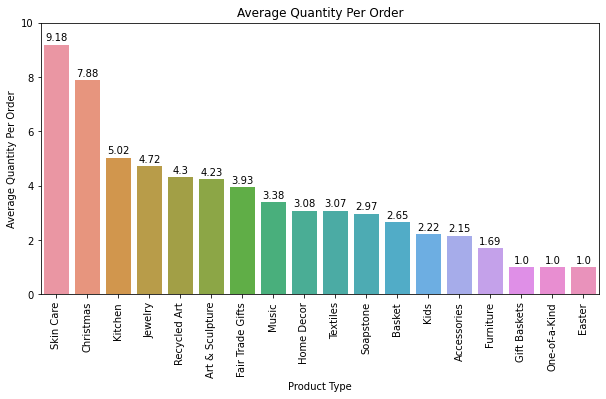

In [19]:
# Create barplot of Average Quantity Per Order
column_name = 'Average Quantity Per Order'
plot_config(figsize=(10,5), xticks_rotation=90, title=column_name, ylim=(0,10))
avqpo_barplot = sns.barplot(x=df_group.sort_values(by=column_name,ascending=False).index,y=column_name,data=df_group.sort_values(by=column_name,ascending=False))
plot_label(df_group[column_name].sort_values(ascending=False),space=0.15,rotation=0)

From the bar chart above, it shows that the most quantity per order does not related to total net sales.

In [21]:
# See the overall number of average quantity per order
df_group[['Total Net Sales','Average Quantity Per Order']].sort_values(by='Average Quantity Per Order',ascending=False)

,Total Net Sales,Average Quantity Per Order
Product Type,,
Skin Care,2571.80,9.18
Christmas,14460.81,7.88
Kitchen,15336.82,5.02
Jewelry,29572.95,4.72
Recycled Art,3704.16,4.30
Art & Sculpture,84480.85,4.23
Fair Trade Gifts,2204.67,3.93
Music,2418.90,3.38
Home Decor,25699.99,3.08


The basket category is very interesting. Comparing to the others, the basket does not have big size but it generate most revenue of the company.

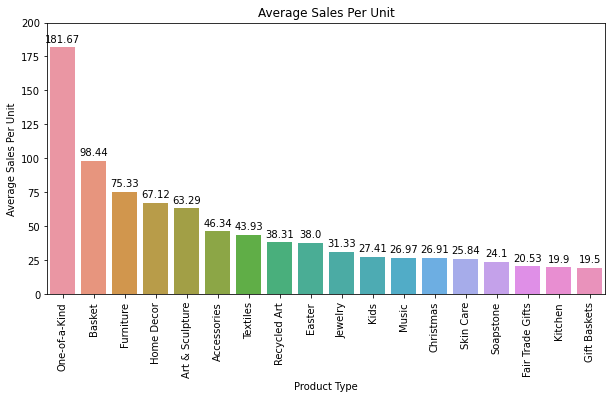

In [23]:
# Create barplot of Average Sales Per Unit
column_name = 'Average Sales Per Unit'
plot_config(figsize=(10,5), xticks_rotation=90, title=column_name, ylim=(0,200))
avgs_barplot = sns.barplot(x=df_group.sort_values(by=column_name,ascending=False).index,y=column_name,data=df_group.sort_values(by=column_name,ascending=False))
plot_label(df_group[column_name].sort_values(ascending=False),space=4,rotation=0)

In [24]:
# See the overall number of average sales per unit
df_group[['Total Net Sales','Average Sales Per Unit']].sort_values(by='Average Sales Per Unit',ascending=False)

,Total Net Sales,Average Sales Per Unit
Product Type,,
One-of-a-Kind,2108.01,181.67
Basket,134791.39,98.44
Furniture,1864.96,75.33
Home Decor,25699.99,67.12
Art & Sculpture,84480.85,63.29
Accessories,3785.38,46.34
Textiles,1679.10,43.93
Recycled Art,3704.16,38.31
Easter,34.20,38.00


The basket and art & sculpture are also interesting in average sales per unit aspects. The number is quite high comparing to the others.

***

# Time Series Analysis <a class="anchor" id="time-series"></a>

For another csv file, there is the time series dataset. First step, the dataframe need to be changed month string to number string, and then convert it to datetime datatype.

In [26]:
# Convert month string into month number string
month = {'January':'01','February':'02','March':'03',
         'April':'04','May':'05','June':'06',
         'July':'07','August':'08','September':'09'
         ,'October':'10','November':'11','December':'12'}

# Import time management dataset
from datetime import datetime

# Convert string into datetime
df2 = df_read_2.copy()
df2['Month'] = df2['Month'].map(month)
df2['Year_Month'] = df2['Year'].astype('str') + '-' + df2['Month']
df2['Year_Month'] = pd.to_datetime(df2['Year_Month'])

In [27]:
df2.head()

,Month,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales,Year_Month
0,01,2017,73,8861.5,-129.40,-448.45,8283.65,1088.30,9371.95,2017-01-01
1,02,2017,56,6908.5,-104.70,-416.20,6387.60,892.45,7280.05,2017-02-01
2,03,2017,60,5778.5,-172.20,-1017.20,4589.10,707.43,5296.53,2017-03-01
3,04,2017,70,8814.0,-281.40,0.00,8532.60,1068.30,9600.90,2017-04-01
4,05,2017,54,6677.0,-185.75,-253.80,6237.45,866.46,7103.91,2017-05-01


The table is hard to analyze. Use the lineplot to help to visualize data.

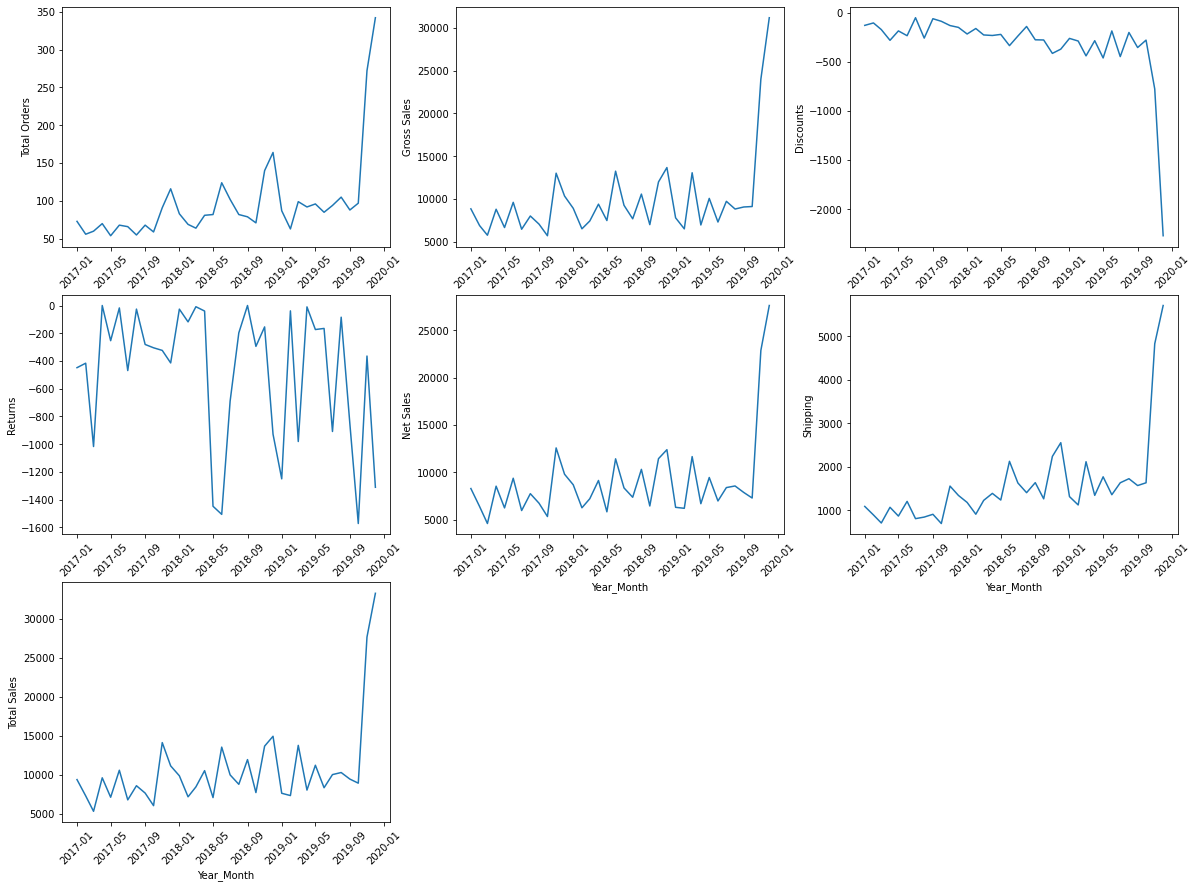

In [29]:
# Create time series plot

fig, axs = plt.subplots(nrows=3,ncols=3,figsize=(20,15))
column_name = ['Total Orders', 'Gross Sales', 'Discounts', 'Returns', 'Net Sales', 'Shipping', 'Total Sales']
for i in range(3):
    axs[i,0].tick_params(axis='x', rotation=45)
    axs[i,1].tick_params(axis='x', rotation=45)
    axs[i,2].tick_params(axis='x', rotation=45)
sns.lineplot(ax=axs[0,0],x='Year_Month', y=column_name[0],data=df2)
sns.lineplot(ax=axs[0,1],x='Year_Month', y=column_name[1],data=df2)
sns.lineplot(ax=axs[0,2],x='Year_Month', y=column_name[2],data=df2)
sns.lineplot(ax=axs[1,0],x='Year_Month', y=column_name[3],data=df2)
sns.lineplot(ax=axs[1,1],x='Year_Month', y=column_name[4],data=df2)
sns.lineplot(ax=axs[1,2],x='Year_Month', y=column_name[5],data=df2)
sns.lineplot(ax=axs[2,0],x='Year_Month', y=column_name[6],data=df2)
fig.delaxes(axs[2,1])
fig.delaxes(axs[2,2])

From **November** and **December** of each year, there are significantly high in revenue. The revenue is quite high in the 2019 comparing to previous year.

***

# Sales Perdiction <a class="anchor" id="sales-prediction"></a>

The regression can be used to predict the future of total net sales. This method will help to analyze the trend better with coefficient.

First step, create number of year from `Year` columns and then split it into X and y dataset.

In [30]:
# Convert year to number of year to fit more in regression
df2['Num_of_Year'] = df2['Year'].astype('int') - 2017
df2_dummies = pd.get_dummies(df2[['Month','Num_of_Year','Total Sales']],columns=['Month'])

# Split into X, y dataset
X = df2_dummies.drop('Total Sales',axis=1)
y = df2_dummies['Total Sales']

In [31]:
# Fit data to Linear Regression
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)

# Print quick results
print('R-Square:',round(reg.score(X,y),2))

R-Square: 0.63


The model has 0.63 of R-Square. The value is positive. It show that the future total net sales will increase overtime.

In [32]:
# See coefficient of each feature
df_coef = pd.DataFrame(data=[X.columns,reg.coef_]).T
df_coef.columns = ['Feature','Coefficient']

# Append the intercept for analyzing
df_coef = df_coef.append({'Feature':'Intercept','Coefficient':reg.intercept_},ignore_index=True)

df_coef

,Feature,Coefficient
0,Num_of_Year,2183.460833
1,Month_01,-1688.711111
2,Month_02,-3385.671111
3,Month_03,-1471.181111
4,Month_04,-1255.747778
5,Month_05,-2178.044444
6,Month_06,176.845556
7,Month_07,-1719.417778
8,Month_08,-1429.081111
9,Month_09,-965.437778


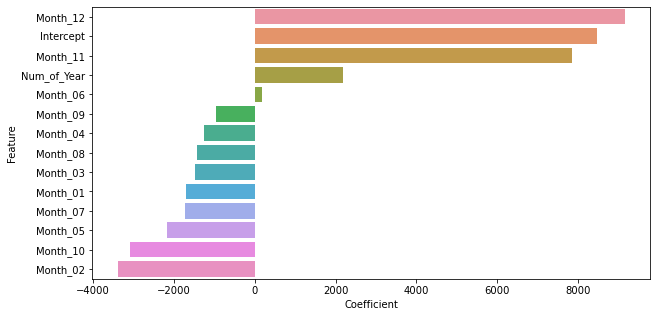

In [33]:
# Plot the bar graph
plt.figure(figsize=(10,5))
coef_barplot = sns.barplot(x='Coefficient',y='Feature',data=df_coef.sort_values(by='Coefficient',ascending=False))

From the bar chart above, November and December are good at sales as mentioned before. The number of year can effect the sale around 2000 for each month. The month 2, 5 and 10 seem to be low season of sales.

Next step, use the coefficent above to predict total net sales in next two years.

In [34]:
# Predict the value
new_prediction = []
new_prediction.append(float(reg.predict(np.array([3,1,0,0,0,0,0,0,0,0,0,0,0]).reshape(1,-1))))
new_prediction.append(float(reg.predict(np.array([3,0,1,0,0,0,0,0,0,0,0,0,0]).reshape(1,-1))))
new_prediction.append(float(reg.predict(np.array([3,0,0,1,0,0,0,0,0,0,0,0,0]).reshape(1,-1))))
new_prediction.append(float(reg.predict(np.array([3,0,0,0,1,0,0,0,0,0,0,0,0]).reshape(1,-1))))
new_prediction.append(float(reg.predict(np.array([3,0,0,0,0,1,0,0,0,0,0,0,0]).reshape(1,-1))))
new_prediction.append(float(reg.predict(np.array([3,0,0,0,0,0,1,0,0,0,0,0,0]).reshape(1,-1))))
new_prediction.append(float(reg.predict(np.array([3,0,0,0,0,0,0,1,0,0,0,0,0]).reshape(1,-1))))
new_prediction.append(float(reg.predict(np.array([3,0,0,0,0,0,0,0,1,0,0,0,0]).reshape(1,-1))))
new_prediction.append(float(reg.predict(np.array([3,0,0,0,0,0,0,0,0,1,0,0,0]).reshape(1,-1))))
new_prediction.append(float(reg.predict(np.array([3,0,0,0,0,0,0,0,0,0,1,0,0]).reshape(1,-1))))
new_prediction.append(float(reg.predict(np.array([3,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1,-1))))
new_prediction.append(float(reg.predict(np.array([3,0,0,0,0,0,0,0,0,0,0,0,1]).reshape(1,-1))))
new_prediction.append(float(reg.predict(np.array([4,1,0,0,0,0,0,0,0,0,0,0,0]).reshape(1,-1))))
new_prediction.append(float(reg.predict(np.array([4,0,1,0,0,0,0,0,0,0,0,0,0]).reshape(1,-1))))
new_prediction.append(float(reg.predict(np.array([4,0,0,1,0,0,0,0,0,0,0,0,0]).reshape(1,-1))))
new_prediction.append(float(reg.predict(np.array([4,0,0,0,1,0,0,0,0,0,0,0,0]).reshape(1,-1))))
new_prediction.append(float(reg.predict(np.array([4,0,0,0,0,1,0,0,0,0,0,0,0]).reshape(1,-1))))
new_prediction.append(float(reg.predict(np.array([4,0,0,0,0,0,1,0,0,0,0,0,0]).reshape(1,-1))))
new_prediction.append(float(reg.predict(np.array([4,0,0,0,0,0,0,1,0,0,0,0,0]).reshape(1,-1))))
new_prediction.append(float(reg.predict(np.array([4,0,0,0,0,0,0,0,1,0,0,0,0]).reshape(1,-1))))
new_prediction.append(float(reg.predict(np.array([4,0,0,0,0,0,0,0,0,1,0,0,0]).reshape(1,-1))))
new_prediction.append(float(reg.predict(np.array([4,0,0,0,0,0,0,0,0,0,1,0,0]).reshape(1,-1))))
new_prediction.append(float(reg.predict(np.array([4,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1,-1))))
new_prediction.append(float(reg.predict(np.array([4,0,0,0,0,0,0,0,0,0,0,0,1]).reshape(1,-1))))
np.around(new_prediction,2)

array([13316.15, 11619.19, 13533.68, 13749.12, 12826.82, 15181.71,
       13285.45, 13575.78, 14039.43, 11912.99, 22859.3 , 24158.74,
       15499.61, 13802.65, 15717.14, 15932.58, 15010.28, 17365.17,
       15468.91, 15759.24, 16222.89, 14096.45, 25042.77, 26342.2 ])

Use the prediction array above to plot the new graph with previous record.

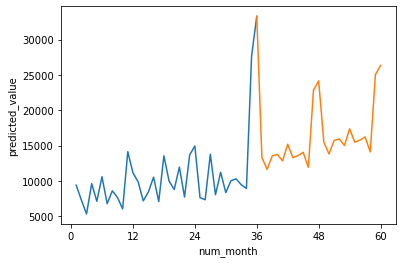

In [35]:
# Plot the new prediction
df_prediction = df2['Total Sales'].append(pd.Series(new_prediction),ignore_index=True)
df_prediction = pd.DataFrame(df_prediction,columns=['predicted_value'])
df_prediction['num_month'] = np.arange(1,len(df_prediction)+1,1)
plt.xticks(np.arange(0,72,12))

# Plot the previous record
sns.lineplot(data=df_prediction[:36],x='num_month',y="predicted_value")

# Plot the prediction
sns.lineplot(data=df_prediction[35:],x='num_month',y="predicted_value");

***

# Recommendation <a class="anchor" id="recommendation"></a>

## What company should focus on?

The company should focus on top six of the best seller product which are:
- **Basket**
- **Art & Sculpture**
- **Jewelry**
- **Home Decor**
- **Kitchen**
- **Christmas**

Furthermore, in timing aspect, the company should focus on campaign in **November** and **December**. The remain month in year should be launched the campaign to boost the sale too.

## What is demographic of company customer?

In [36]:
df_cumsum.head(6)

,Cumulative Total Net Sales,Cumulative Percentage,Rank
Product Type,,,
Basket,134791.39,40.47,1
Art & Sculpture,219272.24,65.83,2
Jewelry,248845.19,74.71,3
Home Decor,274545.18,82.43,4
Kitchen,289882.00,87.03,5
Christmas,304342.81,91.37,6


Referring to this dataset, the top 6 ranks of customer show that the main customers of the company tend to be **adult**. 

## What is the different between years?

To answer this question, the dataset should be converted to year by year sales aspect.

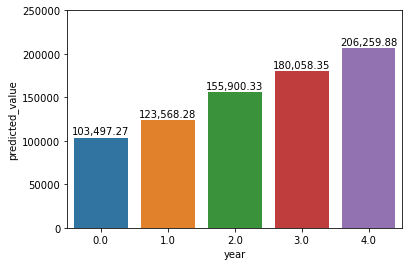

In [37]:
# Create year by year dataframe

df_yearby = df_prediction.copy()
for i in range(len(df_yearby)):
    if df_yearby['num_month'][i] <= 12:
        df_yearby.loc[i,['year']] = 0
    if df_yearby['num_month'][i] > 12 and df_yearby['num_month'][i] <= 24:
        df_yearby.loc[i,['year']] = 1
    if df_yearby['num_month'][i] > 24 and df_yearby['num_month'][i] <= 36:
        df_yearby.loc[i,['year']] = 2
    if df_yearby['num_month'][i] > 36 and df_yearby['num_month'][i] <= 48:
        df_yearby.loc[i,['year']] = 3
    if df_yearby['num_month'][i] > 48 and df_yearby['num_month'][i] <= 60:
        df_yearby.loc[i,['year']] = 4

df_yearby = df_yearby.groupby('year').sum().drop('num_month',axis=1).reset_index()
yearby_barplot = sns.barplot(x='year',y='predicted_value',data=df_yearby)
plt.ylim(0,250000)
plot_label(round(df_yearby['predicted_value'],2),space=4000,rotation=0)

In [38]:
for i in range(len(df_yearby)):
    if i == 4:
        continue
    else:
        print(f"Year {i} to Year {i+1}: {round((df_yearby['predicted_value'][i+1] / df_yearby['predicted_value'][i] * 100)-100,2):.2f}%")

Year 0 to Year 1: 19.39%
Year 1 to Year 2: 26.17%
Year 2 to Year 3: 15.50%
Year 3 to Year 4: 14.55%


The growth between year is more than around **15 percents per year**.

## What is the others data that should be collected?

To perform better analysis, the company can collect more data on the topic of:
- **Cost of selling**: to see the profit margin 
- **Customer satisfaction**: to develop customer service and to measure the company operation
- **Customer Retention**: to see the customer buying behavior

***

[Go back to github project page](https://github.com/Paphawit/Projects)